In [6]:
pip install pandas numpy seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


Missing Values:
 Image    0
Label    0
Path     0
dtype: int64
Statistical Overview:
 count      3000.000000
mean      22731.613000
std       27122.945351
min        3475.000000
25%       10006.500000
50%       15450.000000
75%       25355.250000
max      727906.000000
Name: Image Size (Bytes), dtype: float64
Mean: 22731.613, Median: 15450.0, Mode: 6293, Std Dev: 27122.94535149303


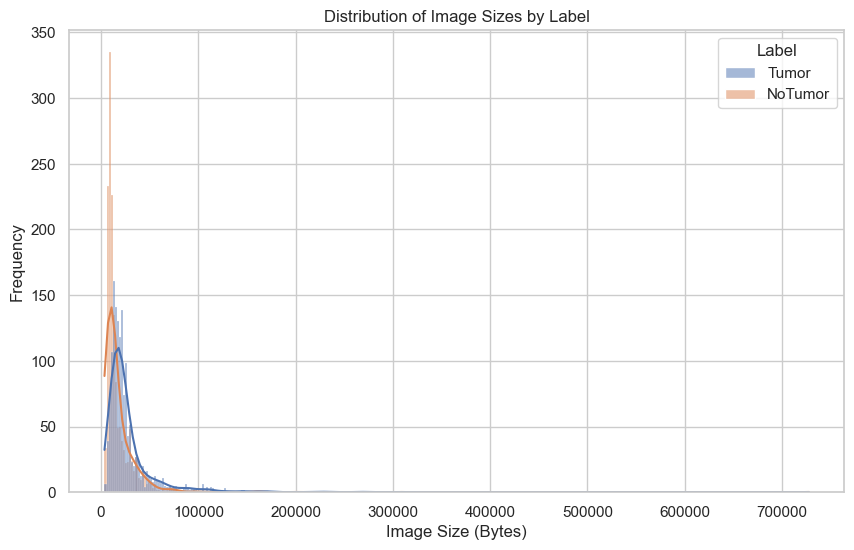

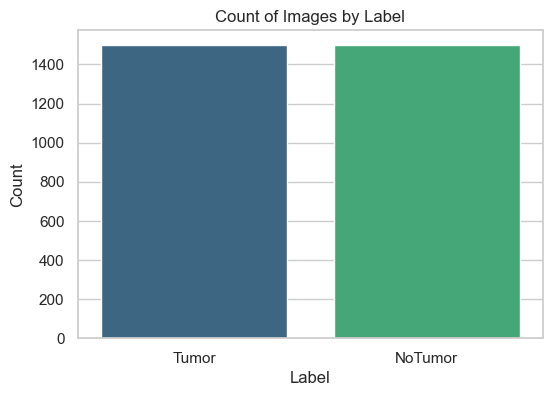

Report saved to C:\Users\s1722\Desktop\dataset_analysis_report.html.


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


dataset_path = r"C:\Users\s1722\Downloads\Compressed\archive"  
yes_path = os.path.join(dataset_path, "yes")
no_path = os.path.join(dataset_path, "no")


def load_dataset_info():
    yes_files = os.listdir(yes_path)
    no_files = os.listdir(no_path)
    dataset_info = pd.DataFrame({
        "Image": yes_files + no_files,
        "Label": ["Tumor"] * len(yes_files) + ["NoTumor"] * len(no_files),
        "Path": [os.path.join(yes_path, file) for file in yes_files] +
                [os.path.join(no_path, file) for file in no_files]
    })
    return dataset_info


dataset = load_dataset_info()


dataset = dataset.drop_duplicates()


missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)


dataset['Image Size (Bytes)'] = dataset['Path'].apply(lambda x: os.path.getsize(x))


stats = dataset['Image Size (Bytes)'].describe()
print("Statistical Overview:\n", stats)


mean_size = dataset['Image Size (Bytes)'].mean()
median_size = dataset['Image Size (Bytes)'].median()
mode_size = dataset['Image Size (Bytes)'].mode()[0]
std_size = dataset['Image Size (Bytes)'].std()

print(f"Mean: {mean_size}, Median: {median_size}, Mode: {mode_size}, Std Dev: {std_size}")


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Image Size (Bytes)', hue='Label', kde=True)
plt.title("Distribution of Image Sizes by Label")
plt.xlabel("Image Size (Bytes)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Label', hue='Label', palette="viridis")
plt.title("Count of Images by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


report_dir = r'C:\Users\s1722\Desktop' 
if not os.path.exists(report_dir):
    os.makedirs(report_dir)


report = {
    "Dataset Shape": dataset.shape,
    "Mean Image Size": mean_size,
    "Median Image Size": median_size,
    "Mode Image Size": mode_size,
    "Std Dev of Image Size": std_size,
    "Statistical Overview": stats.to_dict(),
}


report_df = pd.DataFrame(list(report.items()), columns=["Metric", "Value"])
html_report = report_df.to_html()


report_path = os.path.join(report_dir, 'dataset_analysis_report.html')
with open(report_path, "w") as file:
    file.write(html_report)

print(f"Report saved to {report_path}.")
